In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [3]:
data = pd.read_csv('mobilegames.csv')
data = data.apply(lambda x: x.str.lower())

# The objective here is to transform the original data into a more structured 2d array
games = set(data.values.flatten())
games.remove(np.nan)
newindex = pd.Series(list(games))
df = pd.DataFrame(index=newindex)
for col in data.columns:
    test = newindex.apply(lambda x: x in data[col].values)
    df[col] = test.values

In [4]:
df.head(5)

,Pocketgamer,Androidpit,Gameskinny,Redbytes,Gamezebo,Android Authority,Gameka,148apps
the room old sins,False,False,False,False,False,False,False,True
blade runner 2049,False,True,False,False,False,False,False,False
star wars rivals,False,False,False,False,True,False,False,False
battle bombers arena,False,False,False,False,True,False,False,False
shadowgun wargames,False,True,False,False,False,False,False,False


In [5]:
# Get the top 15 titles going by top number of mentions by the different game review sites
counts = df.sum(axis=1).sort_values(ascending=False).head(15).sort_values()

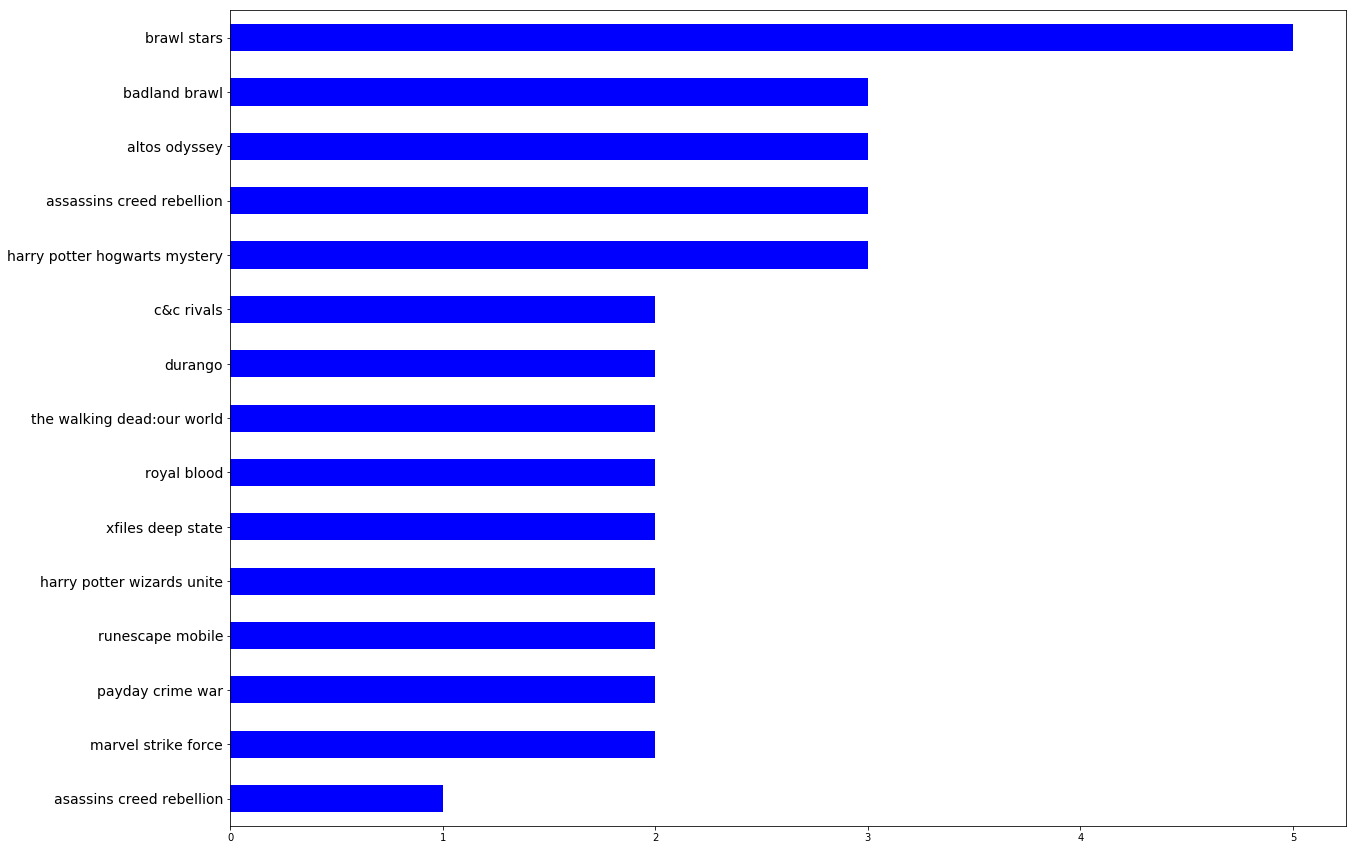

In [6]:
plt.yticks(fontsize=14)
counts.plot.barh(figsize=(20,15), color='blue')

The above plot is functional, but not too visually pleasing.
Let's try to get a better plot with seaborn.

In [7]:
# First, instead of hardcoding, let's get all the titles with 2 or more mentions
counts = df.sum(axis=1)
counts = counts[counts>=2].sort_values(ascending=False).reset_index()
counts = counts.rename(columns={counts.columns[0]:'game', counts.columns[1]:'mentions'})
counts.head(5)

,game,mentions
0,brawl stars,5
1,altos odyssey,3
2,harry potter hogwarts mystery,3
3,assassins creed rebellion,3
4,badland brawl,3


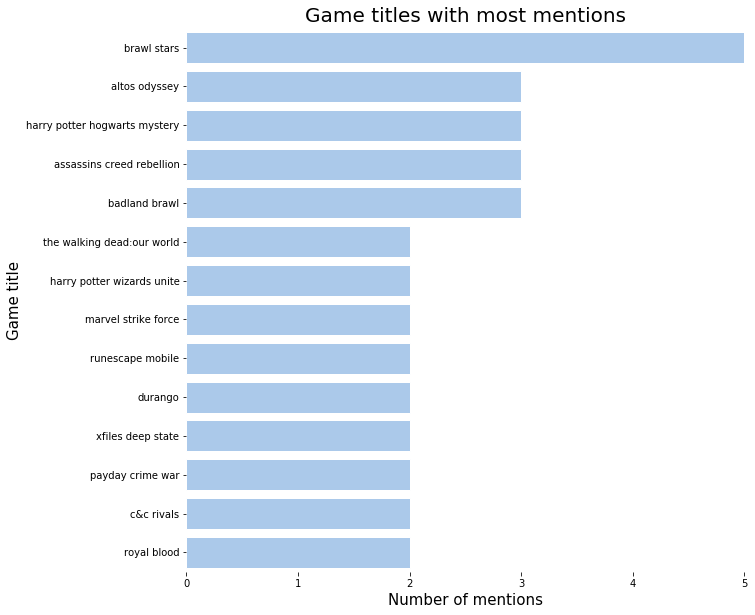

In [8]:
f, ax = plt.subplots(figsize=(10, 10))
sns.set(style="whitegrid")
sns.set_color_codes("pastel")
sns.barplot(x="mentions", y="game", data=counts, color="b")
ax.set(xlim=(0, 5), ylabel="Game title",
       xlabel="Number of mentions", title="Game titles with most mentions")
ax.title.set_fontsize(20)
ax.yaxis.label.set_fontsize(15)
ax.xaxis.label.set_fontsize(15)
sns.despine(left=True, bottom=True)

Now, this looks a lot better!

Unfortunately, we have not really collected enough data to do any meaningful predictive analysis.
However, there should be some ways to improve the current analysis.
For instance, there should be a way to represent the different sources of the mentions for each game.

In [28]:
# First, let's get the 'shortlisted' games
shortlisted = counts['game'].tolist()
shortlisted.reverse()
shortdf = df.loc[shortlisted,:].copy()
shortdf = shortdf.apply(lambda x: x.astype(int))
shortdf.head(5)

,Pocketgamer,Androidpit,Gameskinny,Redbytes,Gamezebo,Android Authority,Gameka,148apps
royal blood,1,0,0,1,0,0,0,0
c&c rivals,0,1,0,0,0,1,0,0
payday crime war,0,0,1,0,0,1,0,0
xfiles deep state,0,0,1,1,0,0,0,0
durango,0,0,1,1,0,0,0,0


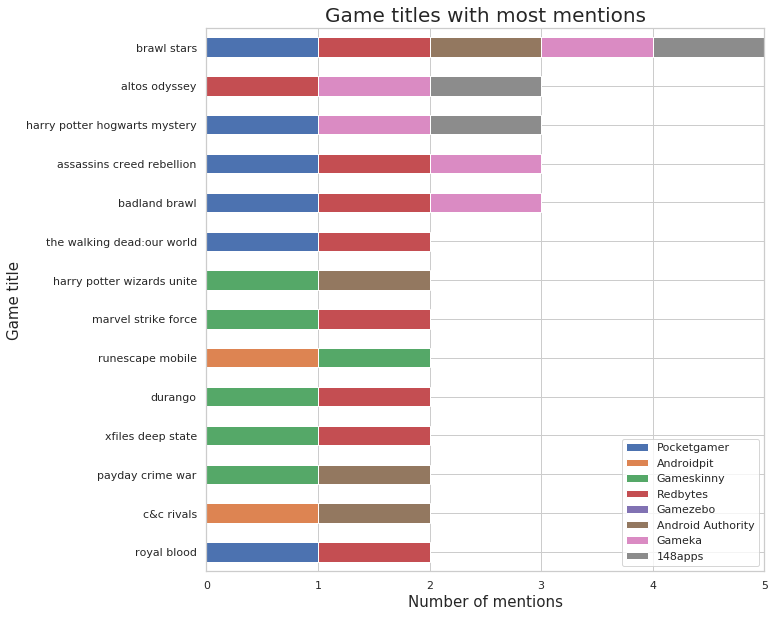

In [29]:
# Great, now do the visualization

f, ax = plt.subplots(figsize=(10, 10))
ax.set(xlim=(0, 5), ylabel="Game title",
       xlabel="Number of mentions", title="Game titles with most mentions")
ax.title.set_fontsize(20)
ax.yaxis.label.set_fontsize(15)
ax.xaxis.label.set_fontsize(15)
shortdf.plot(kind='barh', stacked=True, ax=ax)

Now, it will be cool if we also had some visualization on the overall composition of mentions by source

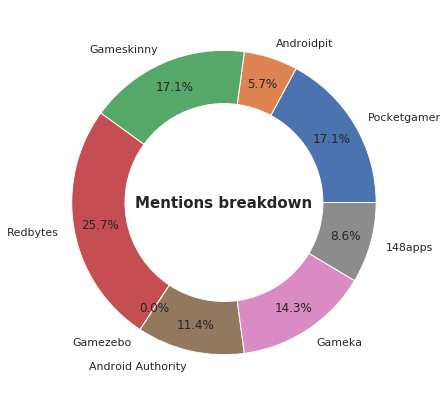

In [48]:
mentions = shortdf.sum()
fig, ax = plt.subplots(figsize=(7, 7))
width = 0.35
outside = ax.pie(mentions, autopct='%.1f%%', pctdistance=1-width/2, radius=1, labels=mentions.index)[0]
plt.setp(outside, width=width, edgecolor='white')
kwargs = dict(size=15, fontweight='bold', va='center')
ax.text(0, 0, 'Mentions breakdown', ha='center', **kwargs)
plt.show()

Now we talking! Awesomesauce!